**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
plt.style.use('classic')
random.seed(42)

## import train and test data for Classification

In [3]:

C_train = pd.read_csv("https://raw.githubusercontent.com/naramendia/portfolio/main/data/Processed_Data/Classification_Train.csv", index_col="Unnamed: 0")
C_test = pd.read_csv("https://raw.githubusercontent.com/naramendia/portfolio/main/data/Processed_Data/Classification_Test.csv",index_col="Unnamed: 0")

In [4]:
C_train.isna().sum()

Positiveg         0
GDPg_past_ma10    1
dtype: int64

## Drop nan for classification Data

In [5]:
C_train =C_train.dropna()

In [6]:
C_train.head()

,Positiveg,GDPg_past_ma10
2,1,-0.389226
3,1,-0.112555
4,0,0.064069
5,0,0.014844
6,1,-0.007675


In [7]:
C_test.isna().sum()

Positiveg         0
GDPg_past_ma10    0
dtype: int64

## import train and test data for Regression

In [8]:

R_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-tutorial-prediction/main/data/Processed_Data/Regression_Train.csv", index_col="Unnamed: 0")
R_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-tutorial-prediction/main/data/Processed_Data/Regression_Test.csv",index_col="Unnamed: 0")

## drop nan for Regression Data

In [9]:
R_train.isna().sum()

theta              0
theta_past_ma10    1
dtype: int64

In [10]:
R_train=R_train.dropna()

In [11]:
R_test.isna().sum()

theta              0
theta_past_ma10    0
dtype: int64

In [12]:
R_train.head()

,theta,theta_past_ma10
0,0.126415,0.557929
1,0.999332,0.562116
2,0.999726,0.562060
3,0.999327,0.597107
4,0.776061,0.675015


In [13]:
R_test.head()

,theta,theta_past_ma10
42300,0.378388,0.543044
42301,0.999835,0.552995
42302,0.131837,0.627107
42303,0.117866,0.621367
42304,0.161604,0.605332


# Machine Learning Classifier

references:


*   classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


*   ROC AUC: 
 * https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-roc-and-auc
 * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
  * https://youtu.be/4jRBRDbJemM





## Define the Train and Test (X,y)


In [51]:
C_train.head()

,Positiveg,GDPg_past_ma10
2,1,-0.389226
3,1,-0.112555
4,0,0.064069
5,0,0.014844
6,1,-0.007675


In [52]:
X_train = pd.DataFrame(np.array(C_train['GDPg_past_ma10']).astype(float).reshape(-1,1))
y_train = pd.DataFrame(C_train['Positiveg'].astype(int))

In [53]:
C_test.head()

,Positiveg,GDPg_past_ma10
51,1,0.076993
52,1,0.091483
53,1,0.078962
54,1,0.074156
55,0,0.069564


In [54]:
X_test = pd.DataFrame(np.array(C_test['GDPg_past_ma10']).astype(float).reshape(-1,1))
y_test = pd.DataFrame(C_test['Positiveg'].astype(int))

## Import base packages

In [55]:
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

## Decision Tree Classifer

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Model

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
mdl = DecisionTreeClassifier().fit(X_train, y_train)

## Result

In [58]:
y_pred= mdl.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

## Evaluations

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


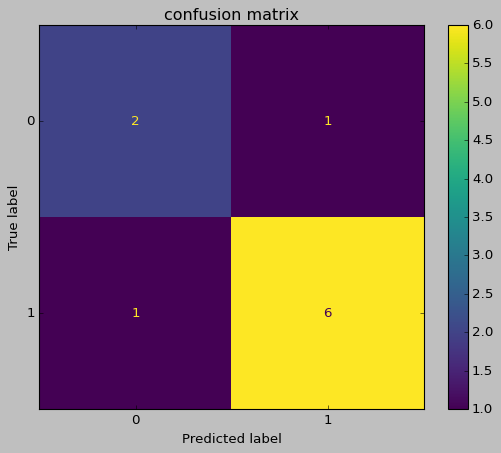

In [60]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


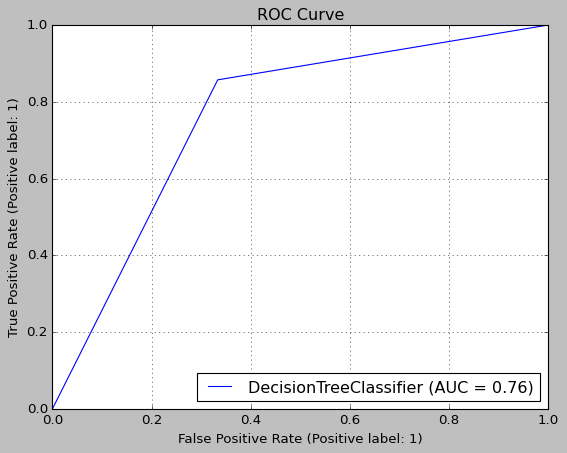

In [61]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Random Forest Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
mdl = RandomForestClassifier().fit(X_train, y_train)

<ipython-input-63-037da15b76a8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestClassifier().fit(X_train, y_train)


In [64]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


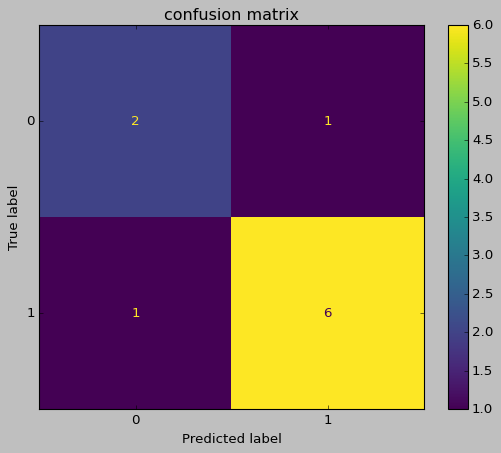

In [65]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


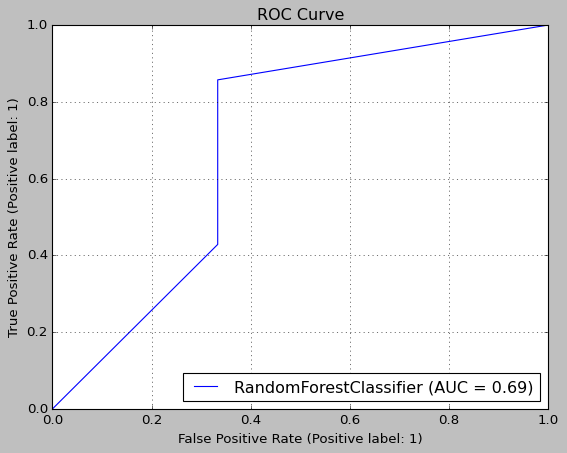

In [66]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Multi-Layer Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [67]:
from sklearn.neural_network import MLPClassifier

In [68]:
mdl = MLPClassifier(hidden_layer_sizes=256).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.70      1.00      0.82         7

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


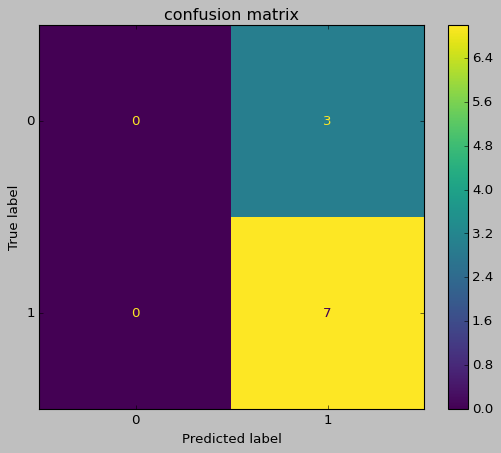

In [70]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

#Ridge Regression

In [71]:
from sklearn import linear_model

In [103]:
mdl = linear_model.Ridge(alpha=.5)

In [104]:
print(classification_report(y_test, mdl.predict(X_test))

SyntaxError: ignored

In [105]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

ValueError: ignored

## Auto-ML Classifier

reference:

https://auto.gluon.ai/stable/index.html

notes: 
* please first install the pacakge and restart run time 
* change runtime type to GPU can accelerate the speed
* after you restart the runtime, please mute the code box for package installation



In [ ]:
!pip install autogluon

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [ ]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [ ]:
predictor = TabularPredictor(
    path='AutogluonModels/classifier',
    label='target'
).fit(train_data)

# predictor = TabularPredictor.load("AutogluonModels/classifier/")

In [ ]:
predictor = TabularPredictor.load("AutogluonModels/classifier/")

In [ ]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
predictor.leaderboard(silent=True, data=test_data,extra_metrics=['accuracy','precision','recall','acc','f1'])

# Machine Learning Regression

## important global packages

In [76]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [77]:
R_train.head()

,theta,theta_past_ma10
0,0.126415,0.557929
1,0.999332,0.562116
2,0.999726,0.562060
3,0.999327,0.597107
4,0.776061,0.675015


In [78]:
X_train = pd.DataFrame(R_train['theta_past_ma10'])
y_train = pd.DataFrame(R_train['theta'])

In [79]:
R_test.head()

,theta,theta_past_ma10
42300,0.378388,0.543044
42301,0.999835,0.552995
42302,0.131837,0.627107
42303,0.117866,0.621367
42304,0.161604,0.605332


In [80]:
X_test = pd.DataFrame(R_test['theta_past_ma10'])
y_test = pd.DataFrame(R_test['theta'])

## Linear Regression

In [81]:
from sklearn import linear_model

In [82]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [83]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: 0.020422878994050486


In [84]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.500459
1,0.495475
2,0.458358
3,0.461232
4,0.469263
...,...
21145,0.484866
21146,0.476818
21147,0.440692
21148,0.485655


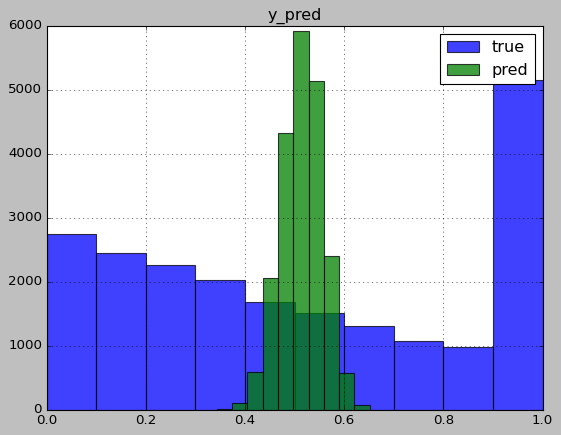

In [85]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Random Forest Regression

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-87-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [88]:
# calculate R2
from sklearn.metrics import r2_score

In [89]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.4167341400418987


In [90]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.371873
1,0.143164
2,0.834581
3,0.571388
4,0.973517
...,...
21145,0.062616
21146,0.688782
21147,0.316138
21148,0.710682


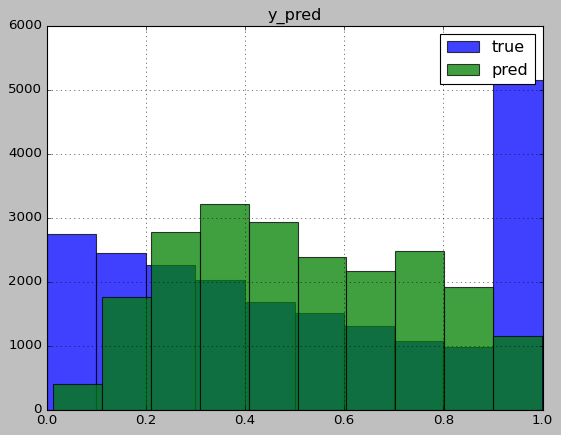

In [91]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Auto-ML

In [92]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [93]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [94]:
predictor = TabularPredictor(
    path='AutogluonModels/regression/',
    label='target'
).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/regression/"
AutoGluon Version:  0.6.0
Python Version:     3.8.15
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    42299
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1.0, 0.0, 0.51469, 0.3428)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12090.5 MB
	Train Data (Original)  Memory Usage: 0.34 MB (0.0% of available memory)
	Inferring data type of each 

In [95]:
predictor = TabularPredictor.load("AutogluonModels/regression/")

In [96]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
# https://auto.gluon.ai/0.3.1/api/autogluon.tabular.models.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=["root_mean_squared_error", "mean_squared_error", "mean_absolute_error", "median_absolute_error", "r2"])

,model,score_test,root_mean_squared_error,mean_squared_error,mean_absolute_error,median_absolute_error,r2,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.340213,-0.340213,-0.115745,-0.300707,-0.321822,0.020744,-0.341329,0.491817,0.091723,34.354357,0.002844,0.000452,0.387385,2,True,12
1,NeuralNetFastAI,-0.340238,-0.340238,-0.115762,-0.300923,-0.321917,0.020603,-0.341457,0.290172,0.030073,32.188000,0.290172,0.030073,32.188000,1,True,8
2,LightGBMXT,-0.340283,-0.340283,-0.115792,-0.300551,-0.321487,0.020344,-0.341566,0.158650,0.059125,0.835633,0.158650,0.059125,0.835633,1,True,3
3,CatBoost,-0.340327,-0.340327,-0.115822,-0.300545,-0.320985,0.020090,-0.341484,0.040151,0.002073,0.943339,0.040151,0.002073,0.943339,1,True,6
4,XGBoost,-0.340629,-0.340629,-0.116028,-0.300926,-0.321108,0.018346,-0.342054,0.017300,0.005252,0.216194,0.017300,0.005252,0.216194,1,True,9
5,LightGBM,-0.340651,-0.340651,-0.116043,-0.301211,-0.321952,0.018224,-0.341877,0.021686,0.005437,0.463803,0.021686,0.005437,0.463803,1,True,4
6,LightGBMLarge,-0.341033,-0.341033,-0.116304,-0.301599,-0.322972,0.016018,-0.342429,0.036740,0.005713,0.499007,0.036740,0.005713,0.499007,1,True,11
7,NeuralNetTorch,-0.342397,-0.342397,-0.117236,-0.298068,-0.302400,0.008132,-0.343992,0.113725,0.014897,65.443951,0.113725,0.014897,65.443951,1,True,10
8,ExtraTreesMSE,-0.363829,-0.363829,-0.132372,-0.312435,-0.302436,-0.119925,-0.366938,2.076902,0.227590,3.823501,2.076902,0.227590,3.823501,1,True,7
9,KNeighborsUnif,-0.373725,-0.373725,-0.139670,-0.319159,-0.307711,-0.181674,-0.375057,0.026269,0.037593,0.038790,0.026269,0.037593,0.038790,1,True,1


In [97]:
r2 = r2_score(y_test,
              predictor.predict(
                  X_test)
              )
print(f'R2 Score: {r2}')

R2 Score: 0.020743972012616463


In [98]:
y_pred = predictor.predict(X_test)
y_pred

42300    0.492552
42301    0.488695
42302    0.459371
42303    0.461060
42304    0.466581
           ...   
63445    0.481167
63446    0.474214
63447    0.451091
63448    0.481350
63449    0.488251
Name: target, Length: 21150, dtype: float32

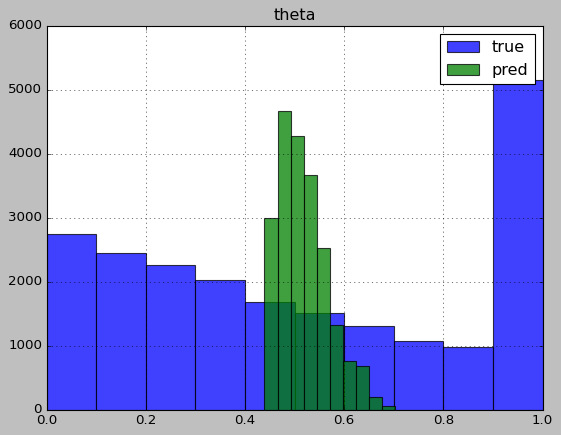

In [99]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()
